In [1]:
using DelimitedFiles, Plots, Statistics

In [2]:
path = "../../../test/epsilon-coupling/"

"../../../test/epsilon-coupling/"

In [3]:
namefile_energies = path * "groundstate_PF00684_n60_mf_viterbi_ENERGIES.txt"
energies_mf = readdlm(namefile_energies);

In [4]:
namefile_param = path * "param_epsilon_coupling.txt"
param_epsilon = readdlm(namefile_param);
[param_epsilon[1,:]]

1-element Vector{Vector{Any}}:
 ["PF00684", 67, 100, 50, 0.2, 0.001, 1.0e-10, "random", "sce", 800, "0.1:0.1:0.4"]

In [5]:
namefile_data = path * "data_epsilon_coupling.txt"
data_epsilon = readdlm(namefile_data);

In [6]:
indseqs = []
idx0s = []
ind = -1.0
for i in 1:size(data_epsilon, 1)
    indprev = ind
    ind = data_epsilon[i,1]
    idx0 = data_epsilon[i,2]
    if ind != indprev
        append!(indseqs, ind)
        append!(idx0s, idx0)
    end
end
indseqs = Int64.(indseqs)
idx0s = Int64.(idx0s)
[indseqs], [idx0s]

([[1, 2, 3, 4, 5, 6]], [[1, 2, 3, 4, 5, 6]])

In [7]:
nsamp = 5

5

In [8]:
epsilons = []
enext = 1.0
diff = -1.0
i = 0
while diff <0
    i += 1
    eprev = enext
    enext = data_epsilon[i,3]
    diff = enext - eprev
    append!(epsilons, enext)
    #@show eprev, enext, diff
end
epsilons = epsilons[1:end-1]
[epsilons]

1-element Vector{Vector{Any}}:
 [-0.0, -0.10000000149011612, -0.20000000298023224, -0.30000001192092896, -0.4000000059604645, -0.5, -0.6000000238418579, -0.699999988079071, -0.800000011920929, -0.8999999761581421, -1.0, -1.2000000476837158, -1.2999999523162842, -1.5]

In [10]:
neps = length(epsilons)

14

In [12]:
reshape(data_epsilon[1:nsamp*neps,3], neps, 5)

14×5 Matrix{Float64}:
 -0.0  -0.0  -0.0  -0.0  -0.0
 -0.1  -0.1  -0.1  -0.1  -0.1
 -0.2  -0.2  -0.2  -0.2  -0.2
 -0.3  -0.3  -0.3  -0.3  -0.3
 -0.4  -0.4  -0.4  -0.4  -0.4
 -0.5  -0.5  -0.5  -0.5  -0.5
 -0.6  -0.6  -0.6  -0.6  -0.6
 -0.7  -0.7  -0.7  -0.7  -0.7
 -0.8  -0.8  -0.8  -0.8  -0.8
 -0.9  -0.9  -0.9  -0.9  -0.9
 -1.0  -1.0  -1.0  -1.0  -1.0
 -1.2  -1.2  -1.2  -1.2  -1.2
 -1.3  -1.3  -1.3  -1.3  -1.3
 -1.5  -1.5  -1.5  -1.5  -1.5

In [13]:
Hdists = reshape(data_epsilon[1:nsamp*neps,4], neps, 5);
emins = reshape(data_epsilon[1:nsamp*neps,5], neps, 5)
Us = reshape(data_epsilon[1:nsamp*neps,6], neps, 5)
Ss = reshape(data_epsilon[1:nsamp*neps,7], neps, 5)
polars = reshape(data_epsilon[1:nsamp*neps,8], neps, 5)
betas = reshape(data_epsilon[1:nsamp*neps,9], neps, 5)
errs = reshape(data_epsilon[1:nsamp*neps,10], neps, 5)
checks = reshape(data_epsilon[1:nsamp*neps,11], neps, 5);

In [14]:
[emins[1,i] - energies_mf[i] for i in 1:5]

5-element Vector{Float64}:
 -0.4230339697265606
 -3.857421887687451e-6
  1.8603515741233423e-6
  2.4755859442393557e-6
  4.858398426677013e-6

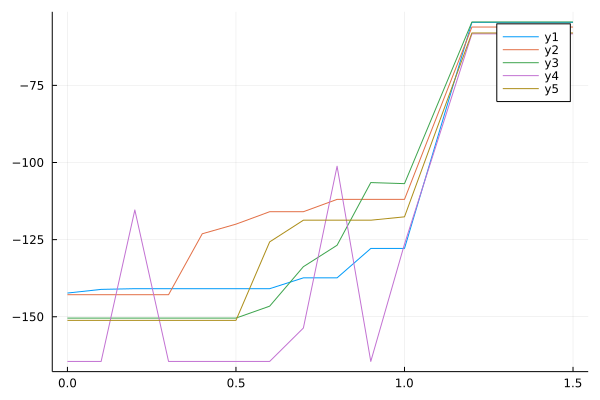

In [15]:
X = emins
p = plot(-epsilons,X[:,1])
for i in 2:5
    plot!(p, -epsilons,X[:,i])
end
p

In [48]:
i=4
j=9
epsilons[j], errs[j,i], mask_errs[j,i]

(-0.800000011920929, 0.7462046146392822, false)

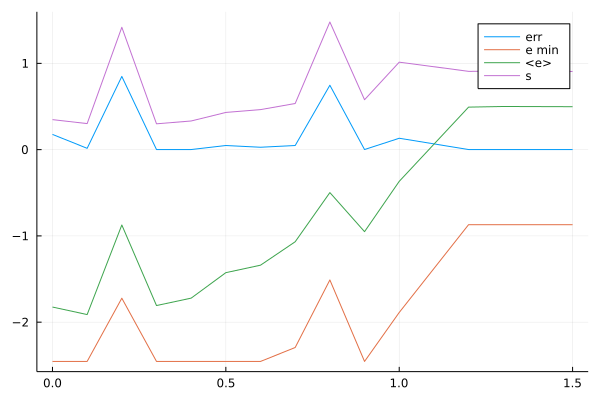

In [41]:
L=67
i=4
plot(-epsilons, errs[:,i], label="err")
plot!(-epsilons, emins[:,i]./L, label="e min")
plot!(-epsilons, Us[:,i]./L, label="<e>")
plot!(-epsilons, Ss[:,i], label="s")

In [17]:
mask_errs = (errs .<=0.001)

14×5 BitMatrix:
 1  1  1  0  1
 1  1  1  0  1
 1  1  1  0  1
 1  1  1  1  1
 1  1  1  1  1
 0  1  1  0  1
 0  1  1  0  1
 0  1  1  0  1
 0  1  1  0  1
 0  1  1  1  1
 1  1  1  0  1
 1  1  1  1  1
 1  1  1  1  1
 1  1  1  1  1

In [18]:
nb_converged = sum(mask_errs, dims=2);

In [19]:
mΔEs = []
vΔEs = []
mΔUs = []
vΔUs = []
mΔdist = []
vΔdist = []
for j in eachindex(epsilons)
    ΔE = []
    ΔU = []
    Δi = []
    for i in 1:nsamp
        if mask_errs[j,i]
            dE = (emins[j,i] - emins[1,i])
            append!(ΔE, dE)
            dU = (Us[j,i] - Us[1,i])
            append!(ΔU, dU)
            di = Hdists[j,i]
            append!(Δi, di)
        end
    end
    append!(mΔEs, mean(ΔE))
    append!(vΔEs, std(ΔE)/sqrt(nb_converged[j]))
    append!(mΔUs, mean(ΔU))
    append!(vΔUs, std(ΔU)/sqrt(nb_converged[j]))
    append!(mΔdist, mean(Δi))
    append!(vΔdist, std(Δi)/sqrt(nb_converged[j]))
end

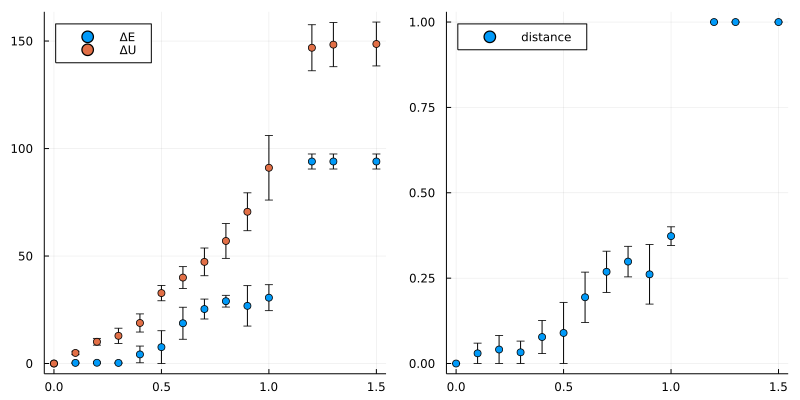

In [20]:
pΔ = scatter(-epsilons, mΔEs, yerr=vΔEs, label="ΔE", legend=:topleft)
scatter!(-epsilons, mΔUs, yerr=vΔUs, label="ΔU")
pdist = scatter(-epsilons, mΔdist, yerr=vΔdist, label="distance", legend=:topleft)
plot(pΔ, pdist, size=(800,400))

In [21]:
mE = []
vE = []
mU = []
vU = []
mS = []
vS = []
for j in eachindex(epsilons)
    EE = []
    UU = []
    SS = []
    for i in 1:5
        if mask_errs[j,i]
            append!(EE, emins[j,i])
            append!(UU, Us[j,i])
            append!(SS, Ss[j,i])
        end
    end
    append!(mE, mean(EE))
    append!(vE, std(EE)/sqrt(nb_converged[j]))
    append!(mU, mean(UU))
    append!(vU, std(UU)/sqrt(nb_converged[j]))
    append!(mS, mean(SS))
    append!(vS, std(SS)/sqrt(nb_converged[j]))
end

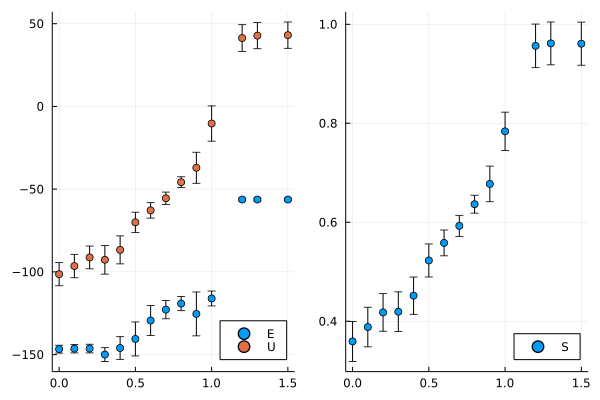

In [22]:
pu = scatter(-epsilons, mE, yerr=vE, label="E", legend=:bottomright)
scatter!(-epsilons, mU, yerr=vU, label="U", legend=:bottomright)
ps = scatter(-epsilons, mS, yerr=vS, label="S", legend=:bottomright)
plot(pu, ps)

In [23]:
μbetas = [mean(betas[j,:]) for j in eachindex(epsilons)]
σbetas = [std(betas[j,:]) for j in eachindex(epsilons)]./sqrt(nsamp)
μerrs = [mean(errs[j,:]) for j in eachindex(epsilons)]
σerrs = [std(errs[j,:]) for j in eachindex(epsilons)]./sqrt(nsamp);

In [24]:
mpolars = []
vpolars = []
for j in eachindex(epsilons)
    pols = []
    for i in 1:5
        if mask_errs[j,i]
            append!(pols, polars[j,i])
        end
    end
    append!(mpolars, mean(pols))
    append!(vpolars, std(pols)/sqrt(nb_converged[j]))
end

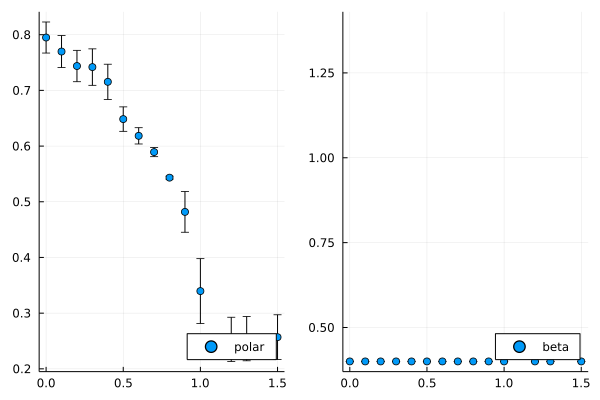

In [25]:
pp = scatter(-epsilons, mpolars, yerr=vpolars, label="polar", legend=:bottomright)
pb = scatter(-epsilons, μbetas, yerr=σbetas, label="beta", legend=:bottomright)
plot(pp, pb)

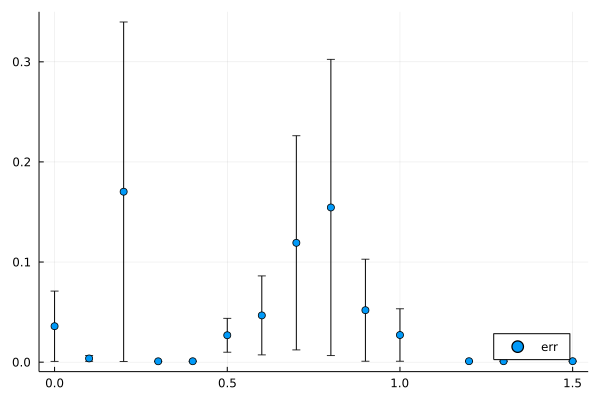

In [26]:
pe = scatter(-epsilons, μerrs, yerr=σerrs, label="err", legend=:bottomright)
#pnunsat = scatter(-epsilons, nbsol_mean, yerr=nbsol_std, label="nsols", legend=:bottomright)
#plot(pe, pnunsat)